In [2]:
%%capture
%pip install nfl_data_py --upgrade

In [3]:
import pandas as pd

import nfl_data_py as nfl
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [4]:
# finding data from 2008 2022
# importing directly from nfl_data_py
seasons = range(2008, 2022)
df = nfl.import_pbp_data(seasons)
df.head()

2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2008_01_ARI_SF,2008090711,SF,ARI,REG,1,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37.0,2008_01_ARI_SF,2008090711,SF,ARI,REG,1,SF,home,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.0,2008_01_ARI_SF,2008090711,SF,ARI,REG,1,SF,home,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,84.0,2008_01_ARI_SF,2008090711,SF,ARI,REG,1,SF,home,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106.0,2008_01_ARI_SF,2008090711,SF,ARI,REG,1,SF,home,ARI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(665389, 390)

In [6]:
# way for us to create for loop to find the relevant columns since the dataset is so large
for column in df.columns:
    if 'rush' in column:
        print(column)
    elif 'distance' in column:
        print(column)
    elif 'yardline' in column:
        print(column)

yardline_100
kick_distance
total_home_rush_epa
total_away_rush_epa
total_home_rush_wpa
total_away_rush_wpa
first_down_rush
rush_attempt
rush_touchdown
lateral_rush
rusher_player_id
rusher_player_name
rushing_yards
lateral_rusher_player_id
lateral_rusher_player_name
lateral_rushing_yards
rusher
rusher_jersey_number
rush
rusher_id
number_of_pass_rushers


In [7]:
# creating a new dataframe made from these 4 columns
rushing_df = df[['rush_attempt', 'rush_touchdown', 'yardline_100', 'two_point_attempt']]

In [8]:
# sorting this new dataframe to where there was a rush attempt, as the rush_attempt and two_point_attempt columns are yes for 1 or no for 0. I forget what the number indexing is called for 1 or 0
rushing_df = rushing_df.loc[(rushing_df['rush_attempt'] == 1 & (rushing_df['two_point_attempt'] == 0))]

rushing_df.sort_values(by='yardline_100')

,rush_attempt,rush_touchdown,yardline_100,two_point_attempt
12567,1.0,1.0,1.0,0.0
431432,1.0,0.0,1.0,0.0
431435,1.0,1.0,1.0,0.0
158039,1.0,0.0,1.0,0.0
431355,1.0,1.0,1.0,0.0
...,...,...,...,...
443453,1.0,0.0,99.0,0.0
465003,1.0,0.0,99.0,0.0
532512,1.0,0.0,99.0,0.0
453559,1.0,0.0,99.0,0.0


In [9]:
# making a new dataframe grouping yardline and rush touchdown, counting the total number of occurences.
# We then set this to a new dataframe rushing_df_probs.
# When looking at the new dataframe, it shows the proprortion for each yardline.
# For example, looking at the 1 yardline, there are 2100 touchdowns and 1722 not touchdowns on a total of 
# 3822 attempts
rushing_df_probs = rushing_df.groupby("yardline_100")['rush_touchdown'].value_counts(normalize=True)

# turned series into data frame
rushing_df_probs = pd.DataFrame({
    'probability_of_touchdown': rushing_df_probs.values
}, index=rushing_df_probs.index).reset_index()

rushing_df_probs

,yardline_100,rush_touchdown,probability_of_touchdown
0,1.0,1.0,0.549451
1,1.0,0.0,0.450549
2,2.0,0.0,0.732605
3,2.0,1.0,0.267395
4,3.0,0.0,0.664270
...,...,...,...
191,97.0,1.0,0.003810
192,98.0,0.0,0.998058
193,98.0,1.0,0.001942
194,99.0,0.0,0.997845


In [10]:
rushing_df_probs = rushing_df_probs.loc[rushing_df_probs['rush_touchdown'] == 1]
rushing_df_probs = rushing_df_probs.drop('rush_touchdown', axis=1)
rushing_df_probs.head(15)


,yardline_100,probability_of_touchdown
0,1.0,0.549451
3,2.0,0.267395
5,3.0,0.335730
7,4.0,0.279971
9,5.0,0.205882
11,6.0,0.156932
13,7.0,0.144866
15,8.0,0.133047
17,9.0,0.084093
19,10.0,0.091549


<Axes: xlabel='yardline_100'>

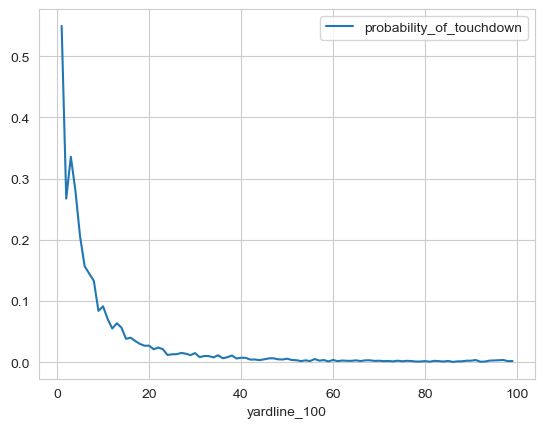

In [11]:
import seaborn as sns; sns.set_style('whitegrid')

rushing_df_probs.plot(x='yardline_100', y='probability_of_touchdown')

In [12]:
# importing 2022 data as pbp_2022
pbp_2022 = nfl.import_pbp_data([2022])

# sorting 2022 by player, playerid, posteam, rush touchdown, and yardline
pbp_2022 = pbp_2022[['rusher_player_name', 'rusher_player_id' , 'posteam', 'rush_touchdown', 'yardline_100']].dropna()

2022 done.
Downcasting floats.


In [13]:
pbp_2022.head()

,rusher_player_name,rusher_player_id,posteam,rush_touchdown,yardline_100
2,Mi.Carter,00-0036924,NYJ,0.0,78.0
4,Mi.Carter,00-0036924,NYJ,0.0,59.0
9,L.Jackson,00-0034796,BAL,0.0,64.0
10,K.Drake,00-0033118,BAL,0.0,60.0
12,K.Drake,00-0033118,BAL,0.0,52.0


In [14]:
exp_df = pbp_2022.merge(rushing_df_probs, how='left', on= 'yardline_100')
exp_df.head()

,rusher_player_name,rusher_player_id,posteam,rush_touchdown,yardline_100,probability_of_touchdown
0,Mi.Carter,00-0036924,NYJ,0.0,78.0,0.001346
1,Mi.Carter,00-0036924,NYJ,0.0,59.0,0.001527
2,L.Jackson,00-0034796,BAL,0.0,64.0,0.002457
3,K.Drake,00-0033118,BAL,0.0,60.0,0.003909
4,K.Drake,00-0033118,BAL,0.0,52.0,0.003516


In [15]:
import numpy as np

# editing the exp_df dataframe by grouping by rushing player name, id, and posteam


exp_df = exp_df.groupby(['rusher_player_name','rusher_player_id', 'posteam'], as_index=False).agg({
    'probability_of_touchdown': np.sum,
    'rush_touchdown': np.sum
# renaming probability and rush_touchdown as seen below 

}).rename({
    'probability_of_touchdown': 'Expected Touchdowns',
    'rush_touchdown': 'Actual Touchdowns'
}, axis=1) #whenever renaming or editing a column must pass axis=1 argument

exp_df = exp_df.sort_values(by='Expected Touchdowns', ascending=False)
exp_df.head()

,rusher_player_name,rusher_player_id,posteam,Expected Touchdowns,Actual Touchdowns
214,Ja.Williams,00-0033948,DET,16.729747,17.0
180,J.Hurts,00-0036389,PHI,14.340624,18.0
132,E.Elliott,00-0033045,DAL,10.834252,12.0
193,J.Mixon,00-0033897,CIN,10.742994,8.0
85,D.Cook,00-0033893,MIN,9.167940,8.0


In [16]:
# renaming columns
exp_df = exp_df.rename({
    "rusher_player_name": "Player",
    "posteam": "Team",
    "rusher_player_id": "ID"
}, axis=1)


exp_df.head()


,Player,ID,Team,Expected Touchdowns,Actual Touchdowns
214,Ja.Williams,00-0033948,DET,16.729747,17.0
180,J.Hurts,00-0036389,PHI,14.340624,18.0
132,E.Elliott,00-0033045,DAL,10.834252,12.0
193,J.Mixon,00-0033897,CIN,10.742994,8.0
85,D.Cook,00-0033893,MIN,9.167940,8.0


In [17]:
# imported weekly data for roster information
roster = nfl.import_weekly_data([2022])
roster.head()

# renamed two columns to match for the exp_df table so i can merge them down below
roster = roster[['player_id', 'position']].rename({
    'player_id': 'ID'
}, axis=1)


exp_df = exp_df.merge(roster, on='ID', how='left')

exp_df.head()



Downcasting floats.


,Player,ID,Team,Expected Touchdowns,Actual Touchdowns,position
0,Ja.Williams,00-0033948,DET,16.729747,17.0,RB
1,Ja.Williams,00-0033948,DET,16.729747,17.0,RB
2,Ja.Williams,00-0033948,DET,16.729747,17.0,RB
3,Ja.Williams,00-0033948,DET,16.729747,17.0,RB
4,Ja.Williams,00-0033948,DET,16.729747,17.0,RB


In [18]:
exp_df = exp_df.loc[exp_df['position'] == 'RB'].drop('position',axis=1)

# dropped duplicate rows because as you can see above I was getting 5 copies of ja.williams lol
exp_df = exp_df.drop_duplicates()

exp_df.head()

,Player,ID,Team,Expected Touchdowns,Actual Touchdowns
0,Ja.Williams,00-0033948,DET,16.729747,17.0
35,E.Elliott,00-0033045,DAL,10.834252,12.0
52,J.Mixon,00-0033897,CIN,10.742994,8.0
69,D.Cook,00-0033893,MIN,9.167940,8.0
87,T.Etienne,00-0036973,JAX,9.142246,6.0


In [19]:
# Ranked the amount of touchdowns per player
exp_df['Actual Touchdowns Rank'] = exp_df['Actual Touchdowns'].rank(ascending=False)

exp_df

,Player,ID,Team,Expected Touchdowns,Actual Touchdowns,Actual Touchdowns Rank
0,Ja.Williams,00-0033948,DET,16.729747,17.0,1.0
35,E.Elliott,00-0033045,DAL,10.834252,12.0,6.5
52,J.Mixon,00-0033897,CIN,10.742994,8.0,12.5
69,D.Cook,00-0033893,MIN,9.167940,8.0,12.5
87,T.Etienne,00-0036973,JAX,9.142246,6.0,19.5
...,...,...,...,...,...,...
3686,R.Bonnafon,00-0034578,WAS,0.004655,0.0,124.5
3741,T.Jones,00-0035860,NO,0.004149,0.0,124.5
3767,D.Williams,00-0030874,ATL,0.003471,0.0,124.5
3822,T.Badie,00-0037085,DEN,0.002461,0.0,124.5


In [25]:
# new column named regression candidate
exp_df['Regression Candidate'] = exp_df['Expected Touchdowns'] - exp_df['Actual Touchdowns']

# sorting them
exp_df.sort_values(by='Regression Candidate', ascending=True)

,Player,ID,Team,Expected Touchdowns,Actual Touchdowns,Actual Touchdowns Rank,Regression Candidate,Positive Regression Candidate
177,A.Ekeler,00-0033699,LAC,8.156520,15.0,2.0,-6.843480,False
161,D.Henry,00-0032764,TEN,8.291085,13.0,3.5,-4.708915,False
195,N.Chubb,00-0034791,CLE,7.826745,12.0,6.5,-4.173255,False
106,M.Sanders,00-0035243,PHI,8.946796,13.0,3.5,-4.053204,False
507,T.Pollard,00-0035261,DAL,4.991694,9.0,10.0,-4.008306,False
...,...,...,...,...,...,...,...,...
388,A.Gibson,00-0036328,WAS,5.972337,3.0,42.5,2.972337,True
87,T.Etienne,00-0036973,JAX,9.142246,6.0,19.5,3.142246,True
466,B.Robinson,00-0037746,WAS,5.363488,2.0,57.0,3.363488,True
316,L.Fournette,00-0033856,TB,6.422050,3.0,42.5,3.422050,True


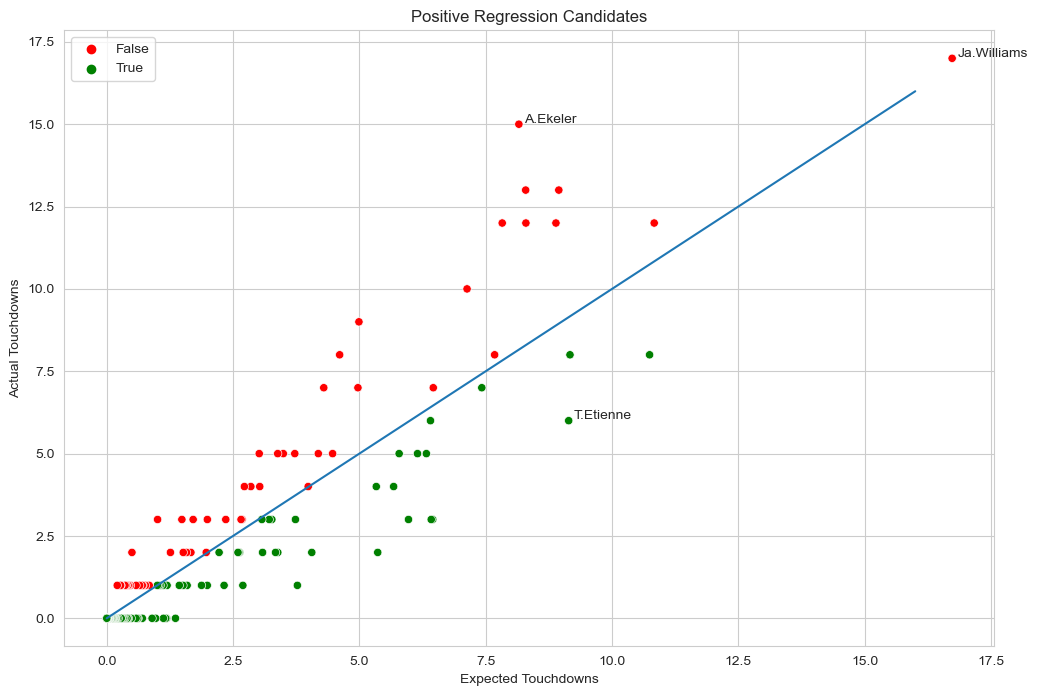

In [81]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))



exp_df['Positive Regression Candidate'] = exp_df ['Regression Candidate'] > 0

# creating a scatter plot
sns.scatterplot(
    hue='Positive Regression Candidate', 
    x='Expected Touchdowns', 
    y='Actual Touchdowns', 
    data = exp_df,
    palette=['r','g'],
).set(title='Positive Regression Candidates')

ax.legend()


# these variables help draw the line to the last point, which is what causes this diagonal line
max_act_touchdowns = int(exp_df['Actual Touchdowns'].max())
max_exp_touchdowns = int(exp_df['Expected Touchdowns'].max())

max_tds = max(max_act_touchdowns, max_exp_touchdowns)

sns.lineplot(x=range(max_tds),y=range(max_tds))

notable_players = ['T.Etienne', 'Ja.Williams', 'A.Ekeler']

for _, row in exp_df.iterrows():
    if row['Player'] in notable_players:
        ax.text(
            x=row['Expected Touchdowns'] + .1,
            y=row['Actual Touchdowns'] + 0.05,
            s=row['Player'] 
        )